<a href="https://colab.research.google.com/github/KarlmerABC/DataScience_Pycaret/blob/main/AnalysisRegression_PyCaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
!pip install pycaret-nightly
!pip install shap
from IPython.display import clear_output 
clear_output()

In [2]:
from pycaret.utils import version
version()

'2.3.10'

In [3]:
import seaborn as sns
import statistics
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import shap
from pycaret.regression import *

calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.


In [4]:
url_obs = 'https://raw.githubusercontent.com/KarlmerABC/DataScience_Pycaret/main/Base/dataset.csv' 
df = pd.read_csv(url_obs, sep=',')
df = df.drop(['Unnamed: 0'], axis=1)

In [5]:
print(df.columns)
print(df.shape)

Index(['duracao_corrigido', 'campo', 'lda', 'sondatipo', 'dist_navegacao_1',
       'mes_1', 'detalhamento_1_1'],
      dtype='object')
(182, 7)


# **PyCaret**

In [6]:
exp_reg = setup(df, target='duracao_corrigido',session_id=42)
# Precisa Clicar "Enter" dentro do quadro que é criado para continuar....

,Description,Value
0,session_id,42
1,Target,duracao_corrigido
2,Original Data,"(182, 7)"
3,Missing Values,False
4,Numeric Features,3
5,Categorical Features,3
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(127, 24)"


In [7]:
# model training & selection
best = compare_models(include = ['rf', 'lightgbm', 'dt', 'et'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,21.1465,830.3880,27.3633,-0.2345,0.5372,0.5818,0.729
lightgbm,Light Gradient Boosting Machine,22.4584,862.0649,28.1095,-0.3598,0.6123,0.6485,0.055
et,Extra Trees Regressor,22.4113,1088.8220,31.2459,-0.7326,0.5642,0.5574,0.411
dt,Decision Tree Regressor,27.0074,1519.9725,37.4333,-1.5932,0.6966,0.6889,0.014


In [8]:
# model training & selection
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,21.2393,9.759641e+02,28.4678,-0.1586,0.6143,0.5897,0.038
rf,Random Forest Regressor,21.1465,8.303880e+02,27.3633,-0.2345,0.5372,0.5818,0.422
ada,AdaBoost Regressor,22.1228,8.648330e+02,27.9157,-0.2614,0.5930,0.6746,0.076
lasso,Lasso Regression,22.6910,9.725965e+02,29.2363,-0.2760,0.6165,0.6907,0.015
dummy,Dummy Regressor,22.7721,9.462816e+02,28.8751,-0.2792,0.6280,0.7213,0.010
knn,K Neighbors Regressor,22.2889,8.707890e+02,27.9841,-0.2846,0.5731,0.6162,0.060
llar,Lasso Least Angle Regression,22.8942,9.510824e+02,28.9701,-0.2877,0.6287,0.7226,0.013
br,Bayesian Ridge,22.8490,9.515609e+02,29.0185,-0.3012,0.6306,0.7234,0.013
en,Elastic Net,22.9912,9.529189e+02,29.1080,-0.3044,0.6278,0.7145,0.014
ridge,Ridge Regression,21.9427,9.219051e+02,28.7722,-0.3084,0.5963,0.6342,0.013


In [9]:
# We can do a compare_models() function without assigning it to a variable. However, we have top 5 models selected using n_select and assigning it to top5 variable. We plan to use this for Stacking and Blending purposes. We have excluded 'RANSAC' (Random Sample Consensus) and 'KNN' (K-Nearest Neighbor) models and have adjusted the default fold value from 10 to 5. 
#top3 = compare_models(n_select=3, exclude=(['lar', 'huber']), sort='R2', fold=10)

In [10]:
# Sometimes you want to include the output of the compare_models() as a screenshot into a report. 
# However, with the yellow highlights it gets difficult to read. Pycaret has thought of that and 
# you can use the pull() function to show the model results in the sort by or ascending order.
#pull().sort_values(by='R2', ascending=True)

In [11]:
# We can tune our top 5 models dynamically with a higher iteration rate (n_iter) to find more optimal hyper parameters 
# over a larger search space. 
#tuned_top5 = [tune_model(i, n_iter=100, optimize='RMSE', fold=5) for i in top5]

In [12]:
# Blending models is an ensemble method of combining different machine learning algorithms and use a majority vote to build consensus of final prediction values. Let's try building a blending model from our top 5 models and evaluate the results. 
#blender_specific = blend_models(estimator_list=tuned_top5[0:], fold=5, optimize='RMSE', choose_better=False)

In [13]:
# Below is a view of the model parameters. 
#blender_specific

# **Filter MODEL**

In [14]:
from pycaret.regression import set_config
set_config('seed', 42)

In [15]:
get_config('seed')

42

In [16]:
rf = create_model('rf', fold = 10, round = 2)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,31.80,1514.25,38.91,-0.15,0.56,0.50
1,7.55,93.54,9.67,0.50,0.34,0.32
2,30.31,1759.85,41.95,-0.05,0.59,0.46
3,26.41,1050.32,32.41,-1.40,0.64,0.81
4,17.06,560.64,23.68,-0.39,0.51,0.56
5,19.97,618.01,24.86,-0.22,0.48,0.51
6,21.06,974.14,31.21,0.46,0.43,0.36
7,21.32,630.81,25.12,0.21,0.66,0.86
8,22.06,785.71,28.03,-0.61,0.70,0.95


In [17]:
# tune hyperparameters of decision tree
tuned_rf = tune_model(rf)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,32.8056,1880.9284,43.3697,-0.4224,0.6061,0.4363
1,11.1463,163.0631,12.7696,0.1208,0.4566,0.5050
2,29.8545,1977.5963,44.4702,-0.1809,0.6014,0.4121
3,19.0323,473.0911,21.7507,-0.0814,0.5599,0.6098
4,14.0773,291.5515,17.0749,0.2778,0.5234,0.5651
5,17.9048,473.9548,21.7705,0.0647,0.4580,0.4740
6,25.2213,1584.4358,39.8050,0.1290,0.5709,0.4905
7,21.8128,675.2858,25.9863,0.1547,0.6454,0.8065
8,21.3067,628.2681,25.0653,-0.2844,0.7159,0.9783


In [18]:
##plot_model(tuned_rf, plot = 'parameter')

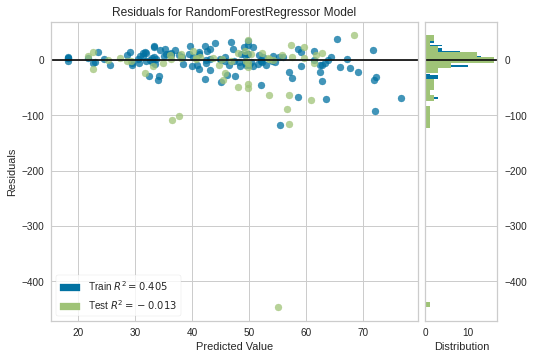

In [19]:
 plot_model(tuned_rf) # plot_model(tuned_rf, 'learning')

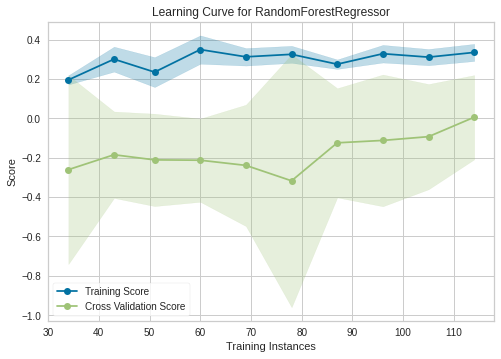

In [20]:
plot_model(tuned_rf, 'learning')

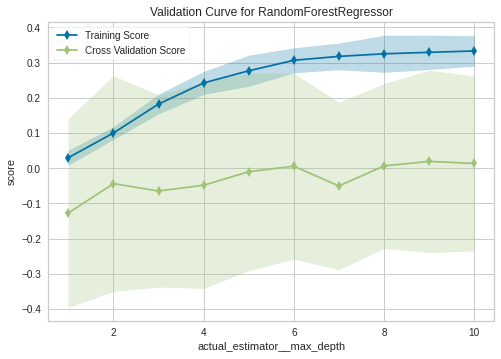

In [21]:
# Validation Curve
plot_model(tuned_rf, plot='vc')

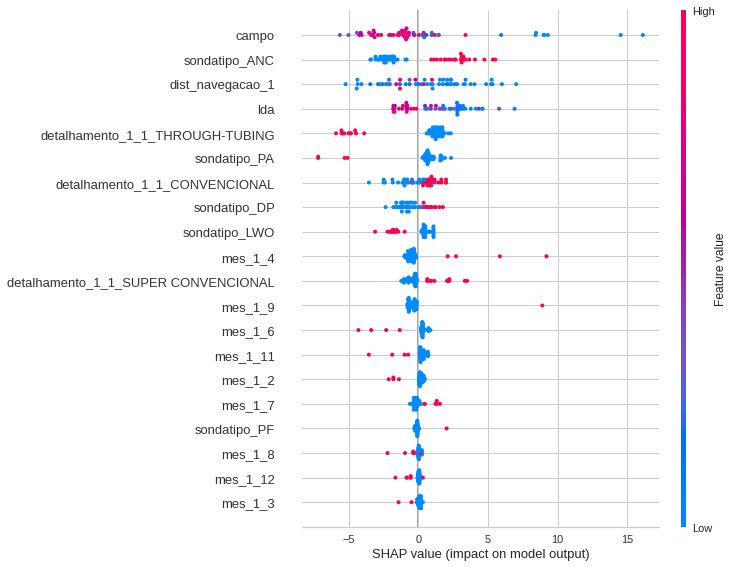

In [22]:
interpret_model(tuned_rf)

In [23]:
#interpret_model(tuned_rf, plot = 'correlation')

In [24]:
interpret_model(tuned_rf, plot = 'reason', observation = 15)

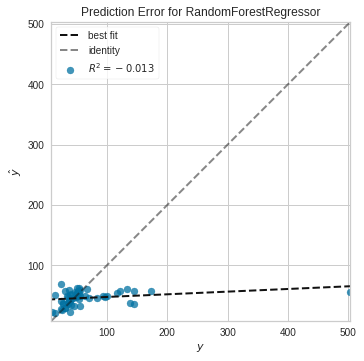

In [25]:
plot_model(tuned_rf, plot='error')

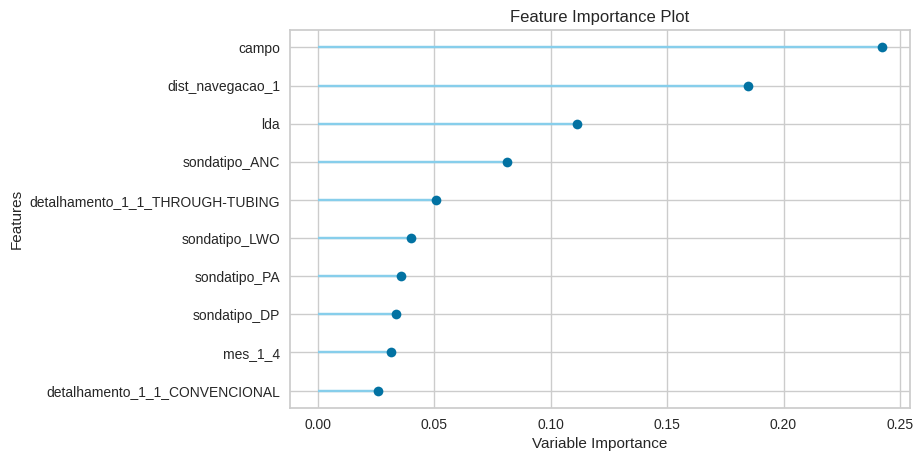

In [26]:
plot_model(tuned_rf, plot='feature')

In [27]:
# Manifold Learning
#plot_model(tuned_rf, plot='manifold')

In [28]:
predictions = predict_model(tuned_rf)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,30.3412,4957.6796,70.4108,-0.0134,0.5998,0.399


In [29]:
finalize_model(tuned_rf)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=11, max_features='log2', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0001,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)